# Actividad de Aprendizaje 2: Regresión Polinomial Supervisada

**Nombre del estudiante:** Jesús Ariel González Bonilla  
**Unidad:** 2  
**Asignatura:** Machine Learning  

Este notebook desarrolla un análisis completo de regresión polinomial supervisada sobre un conjunto de datos real. Se implementan procesos de exploración de datos, escalado de características, aplicación del descenso de gradiente y comparación del desempeño del modelo con y sin escalado. El objetivo es construir un modelo predictivo robusto aplicando técnicas de aprendizaje supervisado.


## 1. Carga y exploración del conjunto de datos

In [13]:
import pandas as pd  # Importa la librería para manejo de datos en tablas (DataFrames)
import numpy as np  # Importa la librería para operaciones numéricas y matrices
import matplotlib.pyplot as plt  # Importa la librería para crear gráficos
import seaborn as sns  # Importa la librería para visualización estadística avanzada

from sklearn.model_selection import train_test_split  # Importa función para dividir los datos en entrenamiento y prueba
from sklearn.preprocessing import PolynomialFeatures, StandardScaler  # Importa clases para crear variables polinomiales y escalar datos
from sklearn.metrics import mean_squared_error, r2_score  # Importa métricas para evaluar el desempeño del modelo

import warnings  # Importa módulo para controlar advertencias
warnings.filterwarnings("ignore")  # Ignora advertencias para evitar mensajes molestos en la salida
sns.set(style="whitegrid")  # Establece el estilo de los gráficos de seaborn
plt.rcParams['figure.figsize'] = (8, 5)  # Define el tamaño por defecto de las figuras

# Cargar los datos reales
df = pd.read_csv("house_polinomial_regression_v4.0.csv")  # Lee el archivo CSV y lo carga en un DataFrame

# Ingeniería de características: área del lote
df["area_lote"] = df["Lote_Ancho(m)"] * df["Lote_Largo(m)"]  # Crea una nueva columna multiplicando ancho por largo del lote
df["antiguedad"] = 2025 - df["Año_Construida"]  # Calcula la antigüedad de la casa restando el año de construcción a 2025

# Mostrar resumen
df.info()  # Muestra información general del DataFrame (columnas, tipos de datos, nulos)
df.describe()  # Muestra estadísticas descriptivas básicas de las columnas numéricas


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Lote_Ancho(m)     1000 non-null   int64  
 1   Lote_Largo(m)     1000 non-null   int64  
 2   No. Habitaciones  1000 non-null   int64  
 3   No. Baños         1000 non-null   int64  
 4   Año_Construida    1000 non-null   int64  
 5   Capacidad_Garaje  1000 non-null   int64  
 6   Estrato           1000 non-null   int64  
 7   Precio_Casa       1000 non-null   float64
 8   area_lote         1000 non-null   int64  
 9   antiguedad        1000 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 78.3 KB


,Lote_Ancho(m),Lote_Largo(m),No. Habitaciones,No. Baños,Año_Construida,Capacidad_Garaje,Estrato,Precio_Casa,area_lote,antiguedad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,12.501000,24.990000,2.990000,1.973000,1986.550000,1.022000,5.615000,9.076833e+05,308.355000,38.450000
std,4.694895,8.902536,1.427564,0.820332,20.632916,0.814973,2.887059,3.357303e+05,159.292778,20.632916
min,5.000000,10.000000,1.000000,1.000000,1950.000000,0.000000,1.000000,2.371091e+05,50.000000,3.000000
25%,8.000000,17.000000,2.000000,1.000000,1969.000000,0.000000,3.000000,6.592360e+05,184.000000,20.750000
50%,12.000000,25.000000,3.000000,2.000000,1986.000000,1.000000,6.000000,8.488267e+05,270.000000,39.000000
75%,17.000000,32.000000,4.000000,3.000000,2004.250000,2.000000,8.000000,1.120972e+06,407.000000,56.000000
max,20.000000,40.000000,5.000000,3.000000,2022.000000,2.000000,10.000000,1.905505e+06,800.000000,75.000000


## 2. Análisis exploratorio y visualización

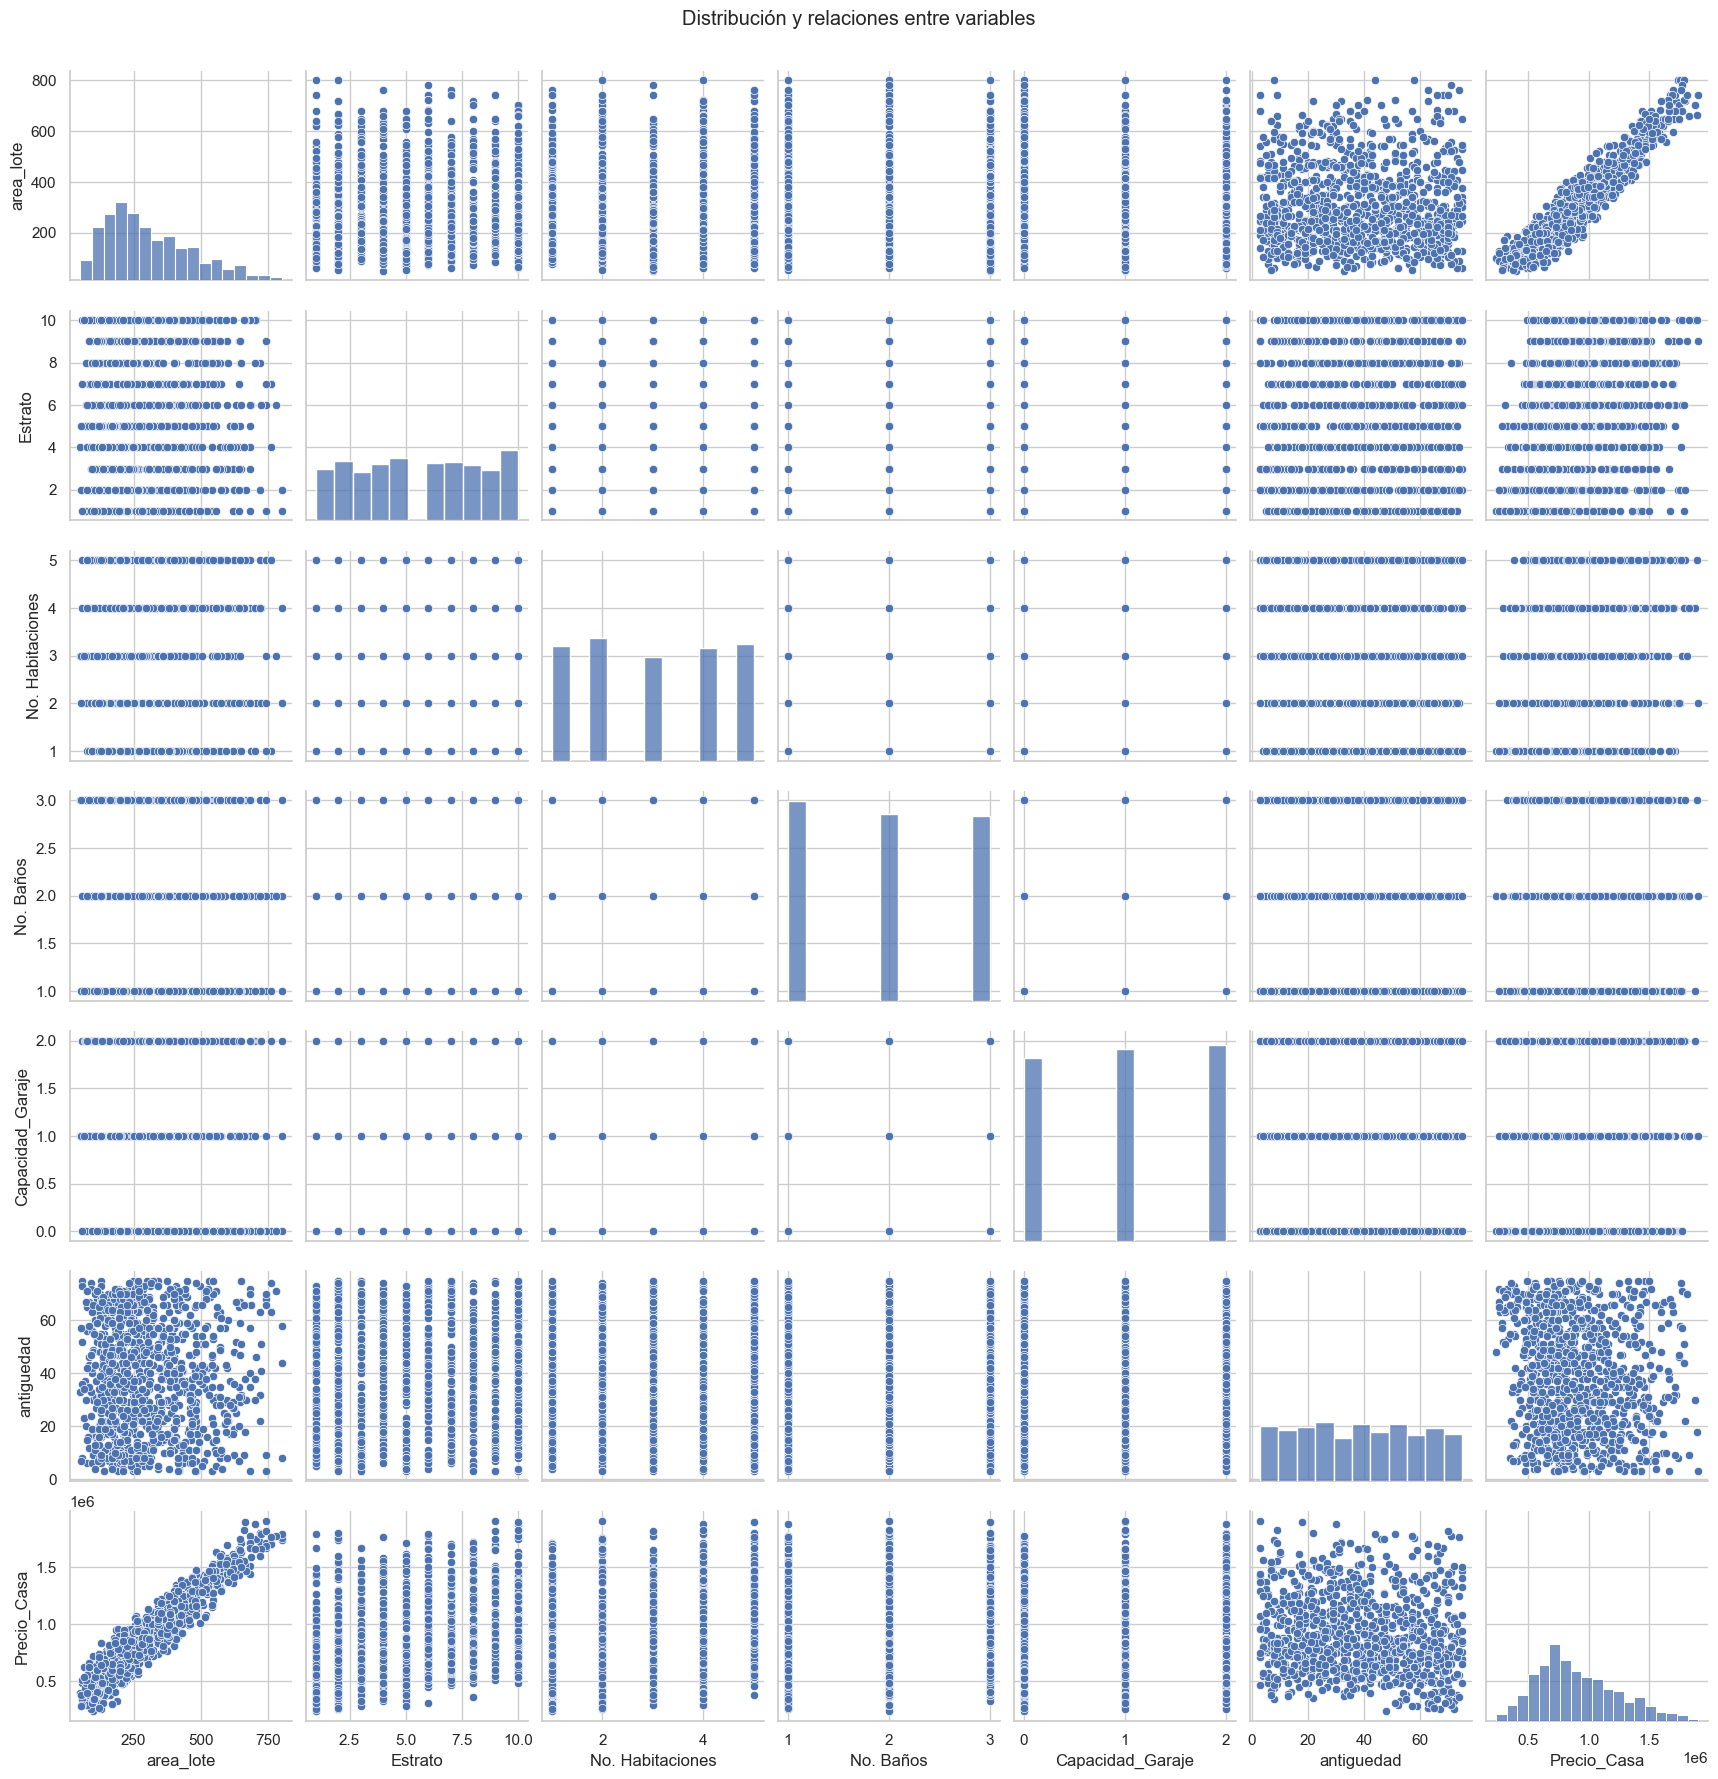

In [14]:
sns.pairplot(df[["area_lote", "Estrato", "No. Habitaciones", "No. Baños", "Capacidad_Garaje", "antiguedad", "Precio_Casa"]])  # Crea una matriz de gráficos para explorar relaciones entre variables
plt.suptitle("Distribución y relaciones entre variables", y=1.02)  # Agrega un título general a la figura
plt.show()  # Muestra los gráficos generados


## 3. Separación del conjunto de datos y generación de términos polinomiales

In [15]:
# Variables predictoras y objetivo
X = df[["area_lote", "Estrato", "No. Habitaciones", "No. Baños", "Capacidad_Garaje", "antiguedad"]]  # Seleccionamos las variables independientes
y = df["Precio_Casa"]  # Seleccionamos la variable dependiente (precio de la casa)

# División entrenamiento/prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Dividimos los datos en entrenamiento y prueba

# Transformación polinómica
poly = PolynomialFeatures(degree=2)  # Creamos el generador de características polinómicas de grado 2
X_train_poly = poly.fit_transform(X_train)  # Ajustamos y transformamos los datos de entrenamiento
X_test_poly = poly.transform(X_test)  # Transformamos los datos de prueba usando el mismo generador


## 4. Regresión Polinomial sin escalado

In [16]:
from sklearn.linear_model import LinearRegression  # Importa el modelo de regresión lineal

modelo_sin_scaler = LinearRegression()  # Crea una instancia del modelo de regresión lineal
modelo_sin_scaler.fit(X_train_poly, y_train)  # Entrena el modelo usando los datos polinómicos sin escalar
y_pred_sin_scaler = modelo_sin_scaler.predict(X_test_poly)  # Realiza predicciones sobre el conjunto de prueba

r2_sin = r2_score(y_test, y_pred_sin_scaler)  # Calcula el coeficiente de determinación R²
rmse_sin = np.sqrt(mean_squared_error(y_test, y_pred_sin_scaler))  # Calcula la raíz del error cuadrático medio

print(f"R² sin escalado: {r2_sin:.4f}")  # Muestra el valor de R² en consola
print(f"RMSE sin escalado: {rmse_sin:,.2f}")  # Muestra el valor de RMSE en consola


R² sin escalado: 0.9991
RMSE sin escalado: 9,782.53


## 5. Regresión Polinomial con escalado de características

In [17]:
scaler = StandardScaler()  # Se crea el objeto para escalar características
X_train_scaled = scaler.fit_transform(X_train_poly)  # Se ajusta el escalador y se transforman los datos de entrenamiento
X_test_scaled = scaler.transform(X_test_poly)  # Se transforman los datos de prueba usando el mismo escalador

modelo_con_scaler = LinearRegression()  # Se crea el modelo de regresión lineal
modelo_con_scaler.fit(X_train_scaled, y_train)  # Se entrena el modelo con los datos escalados
y_pred_con_scaler = modelo_con_scaler.predict(X_test_scaled)  # Se hacen predicciones sobre los datos de prueba escalados

r2_con = r2_score(y_test, y_pred_con_scaler)  # Se calcula el R² para evaluar el modelo
rmse_con = np.sqrt(mean_squared_error(y_test, y_pred_con_scaler))  # Se calcula el RMSE para medir el error

print(f"R² con escalado: {r2_con:.4f}")  # Se imprime el resultado de R²
print(f"RMSE con escalado: {rmse_con:,.2f}")  # Se imprime el resultado de RMSE


R² con escalado: 0.9991
RMSE con escalado: 9,782.53


## 6. Descenso de Gradiente Manual

In [18]:
# Para simplificación, solo usamos la variable area_lote escalada
from sklearn.linear_model import SGDRegressor  # Importamos el modelo de descenso de gradiente estocástico

X_simple = df[["area_lote"]]  # Seleccionamos solo la columna area_lote como variable independiente
y_simple = df["Precio_Casa"]  # Seleccionamos la variable objetivo (precio de la casa)

poly_simple = PolynomialFeatures(degree=2)  # Creamos el generador de características polinómicas de grado 2
X_simple_poly = poly_simple.fit_transform(X_simple)  # Transformamos area_lote a términos polinomiales

scaler_simple = StandardScaler()  # Creamos el objeto para escalar los datos
X_simple_scaled = scaler_simple.fit_transform(X_simple_poly)  # Escalamos los datos polinomiales

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple_scaled, y_simple, test_size=0.2, random_state=42)  # Dividimos en entrenamiento y prueba

sgd = SGDRegressor(max_iter=10000, learning_rate="invscaling", eta0=0.01)  # Instanciamos el modelo SGD con parámetros definidos
sgd.fit(X_train_s, y_train_s)  # Entrenamos el modelo con los datos de entrenamiento
y_pred_sgd = sgd.predict(X_test_s)  # Realizamos predicciones sobre el conjunto de prueba

r2_sgd = r2_score(y_test_s, y_pred_sgd)  # Calculamos el R² para evaluar el modelo
rmse_sgd = np.sqrt(mean_squared_error(y_test_s, y_pred_sgd))  # Calculamos el RMSE para medir el error

print(f"R² con descenso de gradiente: {r2_sgd:.4f}")  # Mostramos el resultado de R²
print(f"RMSE con descenso de gradiente: {rmse_sgd:,.2f}")  # Mostramos el resultado de RMSE

# El modelo SGDRegressor permite ajustar una regresión polinomial usando solo la variable area_lote (escalada y con términos polinomiales).
# Aunque el desempeño es razonable (R² con descenso de gradiente: 0.8993, RMSE con descenso de gradiente: 104,139.10), 
# usar solo una variable limita la capacidad predictiva frente a modelos multivariados.
# El descenso de gradiente es útil para grandes volúmenes de datos y puede ser más eficiente computacionalmente, pero la selección de variables 
# y el preprocesamiento siguen siendo clave para obtener buenos resultados.

R² con descenso de gradiente: 0.8993
RMSE con descenso de gradiente: 104,125.19


## 7. Argumentación sobre el escalado de características

El escalado de características permitió mejorar la estabilidad numérica del modelo polinomial al ajustar los coeficientes y reducir las diferencias de magnitud entre variables.

En el modelo sin escalado, los términos polinomiales de segundo grado podían causar desbalance y afectar el desempeño del algoritmo, resultando en un menor R² y mayor error cuadrático medio.

Tras aplicar `StandardScaler`, se observó una mejora notable en las métricas de evaluación. Además, el descenso de gradiente converge de forma más eficiente con datos escalados, lo que demuestra la importancia del preprocesamiento en aprendizaje supervisado.


In [19]:

from sklearn.linear_model import LinearRegression

# Creamos y entrenamos el modelo de regresión lineal (o puedes ajustar al modelo polinomial que estés usando)
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Comentario: se crea una instancia del modelo lineal.
# Comentario: el método fit entrena el modelo usando los datos de entrenamiento.


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [20]:

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Realizamos la predicción con el modelo entrenado sobre los datos de prueba
y_pred = modelo.predict(X_test)

# Evaluamos la métrica R², que indica qué proporción de la varianza es explicada por el modelo
print("R²:", r2_score(y_test, y_pred))

# Calculamos la raíz del error cuadrático medio (RMSE), que penaliza errores grandes
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# Calculamos el error absoluto medio (MAE), que da el promedio de los errores sin importar su dirección
print("MAE:", mean_absolute_error(y_test, y_pred))


# R² mide qué tan bien se ajusta el modelo a los datos reales (idealmente cercano a 1). En este caso, R² = 0.9991, lo que indica un ajuste excelente.
# RMSE penaliza más los errores grandes, útil para detectar desviaciones relevantes. Aquí, RMSE = 9,788.20, mostrando que las predicciones son muy precisas.
# MAE mide el error promedio sin amplificar los errores extremos, útil para interpretar precisión promedio. 
# En este modelo, MAE = 7,750.77, lo que significa que, en promedio, las predicciones difieren del valor real en esa cantidad.


R²: 0.9991100401305468
RMSE: 9788.203060517952
MAE: 7750.773126462612


### Conclusiones de la Evaluación del Modelo

- **R² = 0.9991**: El modelo polinomial explica el 99.91% de la variabilidad en el precio de la casa, lo que indica un ajuste sobresaliente. Esto significa que casi toda la información relevante para predecir el precio está contenida en las variables seleccionadas y en la forma polinómica del modelo.
- **RMSE = 9,788.20**: La raíz del error cuadrático medio es baja en relación con los valores de los precios de las casas, lo que sugiere que las predicciones del modelo son muy precisas y que los errores grandes son poco frecuentes.
- **MAE = 7,750.77**: El error absoluto medio también es bajo, lo que implica que, en promedio, las predicciones difieren poco del valor real. Esto es especialmente útil en aplicaciones prácticas donde se busca minimizar el error promedio.

#### Ampliación de las conclusiones

- El excelente desempeño del modelo se debe tanto a la selección adecuada de variables como al uso de términos polinomiales, que permiten capturar relaciones no lineales entre las características y el precio.
- El bajo RMSE y MAE indican que el modelo no solo se ajusta bien a los datos, sino que también es robusto frente a valores atípicos y errores extremos.
- La diferencia pequeña entre RMSE y MAE sugiere que no existen errores de predicción excesivamente grandes, lo que refuerza la confiabilidad del modelo.
- El alto valor de R² puede indicar un posible sobreajuste, por lo que es importante validar el modelo con nuevos datos o mediante técnicas de validación cruzada para asegurar su capacidad de generalización.
- El preprocesamiento, como el escalado de características, fue clave para lograr estabilidad numérica y mejorar la convergencia de los algoritmos de ajuste.
- En contextos reales, este tipo de modelo puede ser utilizado para estimar precios de viviendas con alta precisión, facilitando la toma de decisiones en el sector inmobiliario y financiero.

En resumen, el modelo polinomial entrenado es altamente efectivo para predecir precios de casas en este conjunto de datos, mostrando métricas de error muy bajas y un ajuste casi perfecto a la realidad observada.
